<a href="https://colab.research.google.com/github/XaviPat01/ML_TechAnalogy_Workshop/blob/main/Major_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Google Play Store Apps**
>by Avi Patni

Dataset source: https://www.kaggle.com/lava18/google-play-store-apps



In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from IPython.display import display
from scipy import stats

In [113]:
pstore_url = "https://raw.githubusercontent.com/XaviPat01/ML_TechAnalogy_Workshop/main/Major%20Project%202/googleplaystore.csv"
# reviews_url = "https://raw.githubusercontent.com/XaviPat01/ML_TechAnalogy_Workshop/main/Major%20Project%202/googleplaystore_user_reviews.csv"

df = pd.read_csv(pstore_url)

In [114]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [116]:
columns = df.columns

##Cleaning the Data

In [117]:
unique_val = {}
for column in columns:
  vals = df[column].unique()
  unique_val[column] = vals
  print(column)
  print(vals.shape)
  print(vals)

App
(9660,)
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
Category
(34,)
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
Rating
(41,)
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
Reviews
(6002,)
['159' '967' '87510' ... '

**Inference :**
Some incorrect values:
1. 1.9 in Category
2. nan, 19 (should be a value $\leq$ 5) in Rating
3. Free (should be a number) in Installs
4. nan, 0 in Type
5. Everyone in Price
6. nan in Content Rating
7. February 11,2018 in Genres
8. nan in Android Ver

Other conclusions:
* Sizes are in MB and KB both - Convert to a single unit, remove the M/k from the end, convert to floats
* Price - Remove $ and convert to floats
* Handle duplicate "App"s

In [118]:
df[df['Android Ver'].isna()]
df.dropna(subset = ['Android Ver'], inplace = True)

In [119]:
df[df['Current Ver'].isna()]
df.dropna(subset=['Current Ver'], inplace = True)

In [120]:
df[df['Type'].isna()]
df.dropna(subset = ['Type'],inplace = True)

To get the number of null/nan values:

In [121]:
df.isnull().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [122]:
app_dp = df[df.duplicated(['App'])]
names = app_dp['App'].unique()
dup_df = pd.DataFrame(columns = columns)
dup_df
for name in names:
  vals = df.loc[df['App']==name,:]
  dup_df = dup_df.append(vals)

In [123]:
dup_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up


**Inference :**
Certain rows are complete duplicates, whereas some of them have different values in the reviews field

Let's drop the duplicate rows

In [163]:
names_uniq = set()
clean_df = df.sort_values(by=['Rating'],ascending = False,inplace=False)
for ind in clean_df.index:
  row = clean_df.loc[ind,:]
  if row['App'] in names_uniq:
    clean_df.drop(index = ind, inplace=True)
  else:
    names_uniq.add(row['App'])
clean_df.shape

(9648, 13)

In [164]:
clean_df.isnull().sum()

App                  0
Category             0
Rating            1458
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

**Inference :**
Number of nan/null values is considerable in Rating field

In [165]:
groups = clean_df[clean_df.isna().any(axis=1)]
mean_vals = {}
df.columns
for name in df['Category']:
  mean_vals[name] = df.loc[df['Category']==name,'Rating'].mean()
print(mean_vals)

{'ART_AND_DESIGN': 4.377049180327869, 'AUTO_AND_VEHICLES': 4.19041095890411, 'BEAUTY': 4.278571428571428, 'BOOKS_AND_REFERENCE': 4.346067415730338, 'BUSINESS': 4.121452145214522, 'COMICS': 4.155172413793104, 'COMMUNICATION': 4.158536585365852, 'DATING': 3.9707692307692306, 'EDUCATION': 4.389032258064517, 'ENTERTAINMENT': 4.126174496644294, 'EVENTS': 4.435555555555557, 'FINANCE': 4.131888544891644, 'FOOD_AND_DRINK': 4.1669724770642205, 'HEALTH_AND_FITNESS': 4.2771043771043775, 'HOUSE_AND_HOME': 4.197368421052633, 'LIBRARIES_AND_DEMO': 4.1796875, 'LIFESTYLE': 4.094904458598724, 'GAME': 4.2863263445761195, 'FAMILY': 4.192382588774344, 'MEDICAL': 4.18914285714286, 'SOCIAL': 4.255598455598457, 'SHOPPING': 4.259663865546221, 'PHOTOGRAPHY': 4.192113564668767, 'SPORTS': 4.223510971786835, 'TRAVEL_AND_LOCAL': 4.10929203539823, 'TOOLS': 4.047203274215554, 'PERSONALIZATION': 4.335256410256414, 'PRODUCTIVITY': 4.211396011396012, 'PARENTING': 4.300000000000001, 'WEATHER': 4.243999999999999, 'VIDEO_

In [170]:
# for elem in mean_vals:
#   # print((clean_df.loc[clean_df['Category']==elem]).isna().sum())
#   clean_df.loc[clean_df['Category']==elem,'Rating'] = clean_df.loc[clean_df['Category']==elem,'Rating'].fillna(mean_vals[elem])

for ind in clean_df[clean_df.isna().any(axis=1)].index:
  row = clean_df.loc[ind,:]
  category = row['Category']
  clean_df.at[ind,'Rating'] = mean_vals[category]

In [171]:
clean_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

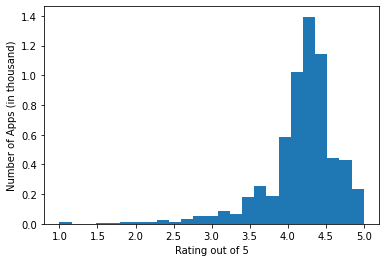

In [172]:
plt.hist(clean_df['Rating'], bins=25, density=True)
plt.xlabel('Rating out of 5')
plt.ylabel('Number of Apps (in thousand)')
plt.show()

In [174]:
mean = np.mean(clean_df['Rating'])
median = np.median(clean_df['Rating'])
mode = stats.mode(clean_df['Rating'],axis = None)


print(mean, median, mode)

4.174972227737434 4.2 ModeResult(mode=array([4.3]), count=array([898]))


## **Data Preprocessing**